In [1]:
# Reading the data
import pandas as pd

df = pd.read_csv('diabetes.csv')

In [2]:
# showing the first 5 rows
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# using info() to know the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# using describe() to have an overview of the numerical columns
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# to make sure that there are no duplicated rows
df.duplicated().sum()

np.int64(0)

In [6]:
#checking the null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Some Notes about our results
1) there are 768 rows in our data
2) 9 columns including the target("Outcome") column
3) 8 columns have "int64" or "float64" as a data type 
4) 1 column has "object" as a data type (the target("Outcome") column is actually a categorical column)
5) There are no duplicated rows
6) There are no null values

In [7]:
# firstly we will turn the target variable into categorical
df['Outcome'] = df['Outcome'].astype('category')

In [ ]:
# then we will separate the numerical and categorical columns
df_cat = df.select_dtypes(include=['category'])
df_num = df.select_dtypes(include=['int64', 'float64'])

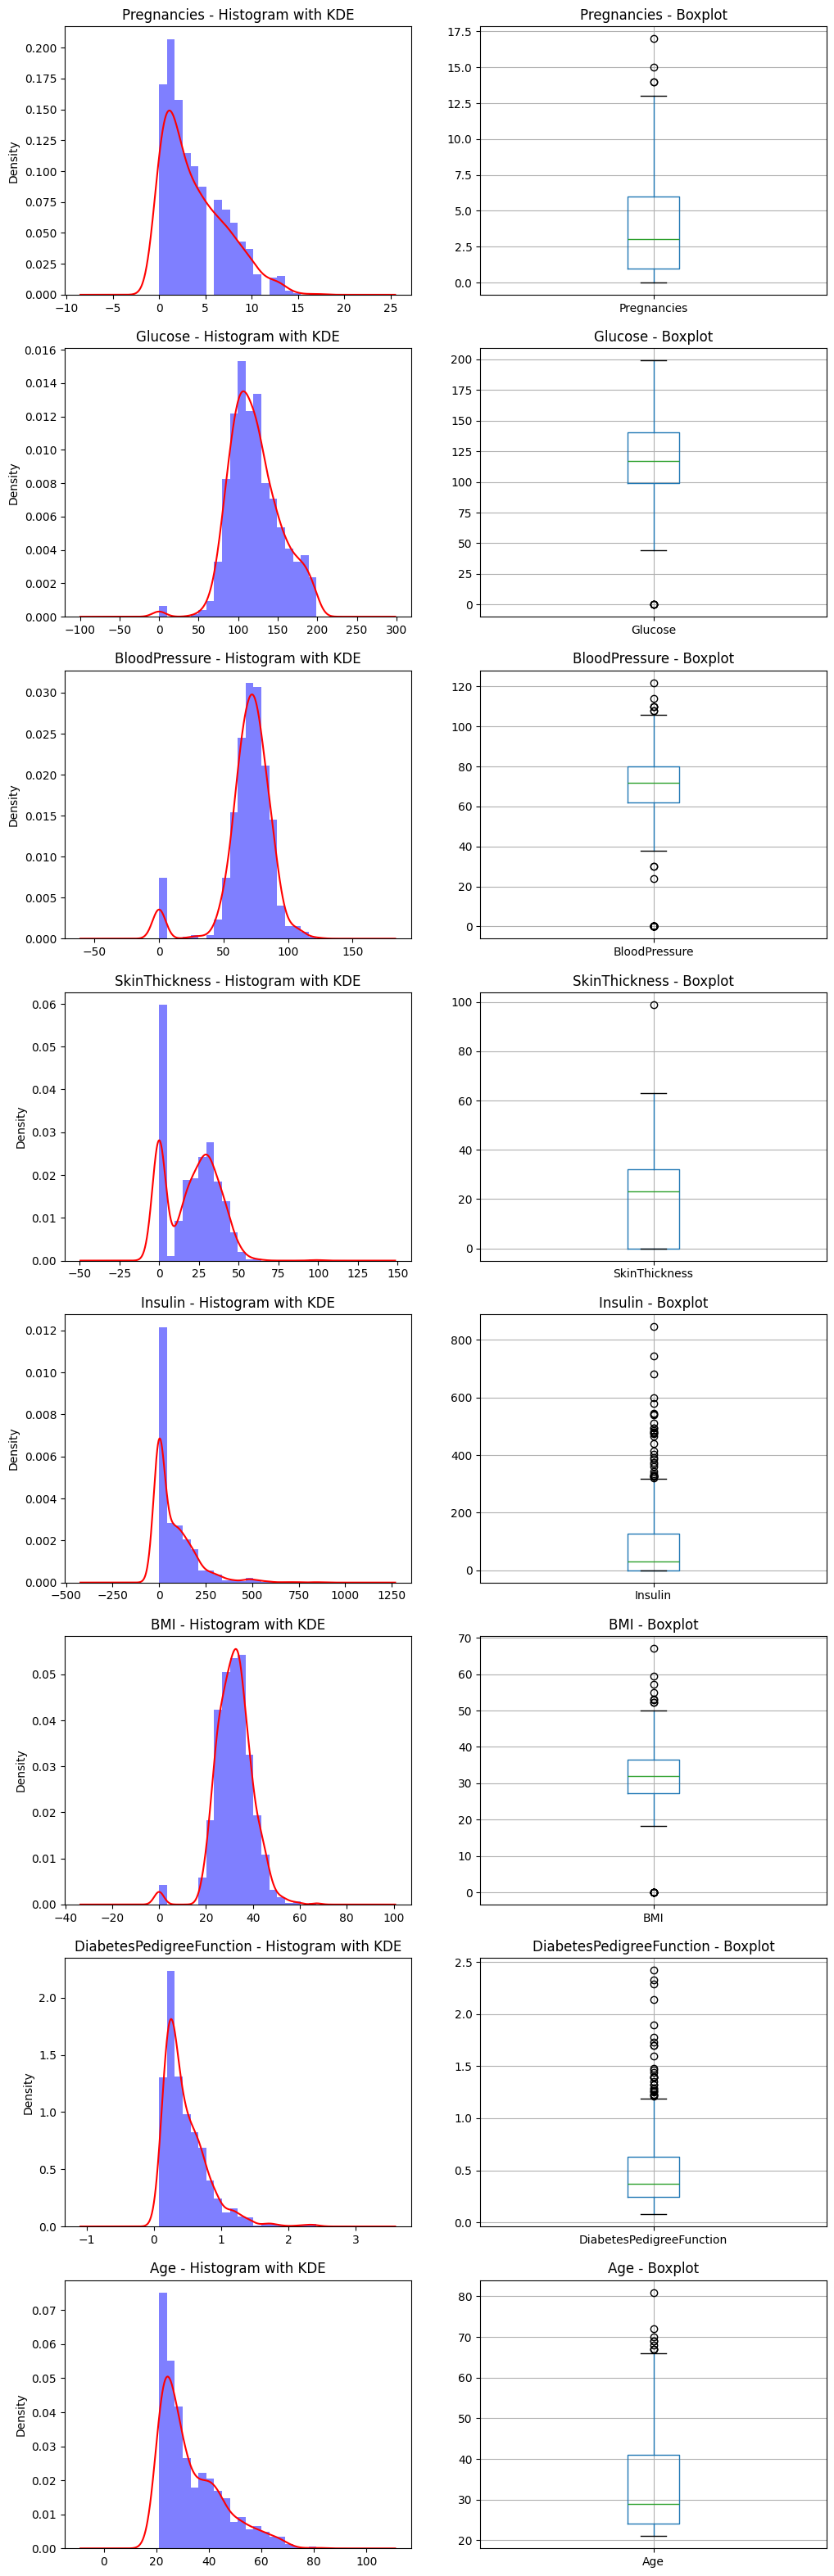

In [11]:
# lets draw histograms with KDE for the numerical columns to know how they are distributed
import numpy as np
import matplotlib.pyplot as plt

# Sample data creation
np.random.seed(0)

# Plotting Histogram with KDE and Boxplot for each numerical feature
fig, axes = plt.subplots(len(df_num.columns), 2, figsize=(12, 5 * len(df_num.columns)))

for i, col in enumerate(df_num.columns):
    # Histogram with KDE
    df_num[col].plot(kind='hist', density=True, ax=axes[i, 0], bins=20, alpha=0.5, color='blue')
    df_num[col].plot(kind='kde', ax=axes[i, 0], color='red')
    axes[i, 0].set_title(f'{col} - Histogram with KDE')

    # We can add Boxplot to be more clear
    # Boxplot
    df_num.boxplot(column=col, ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} - Boxplot')

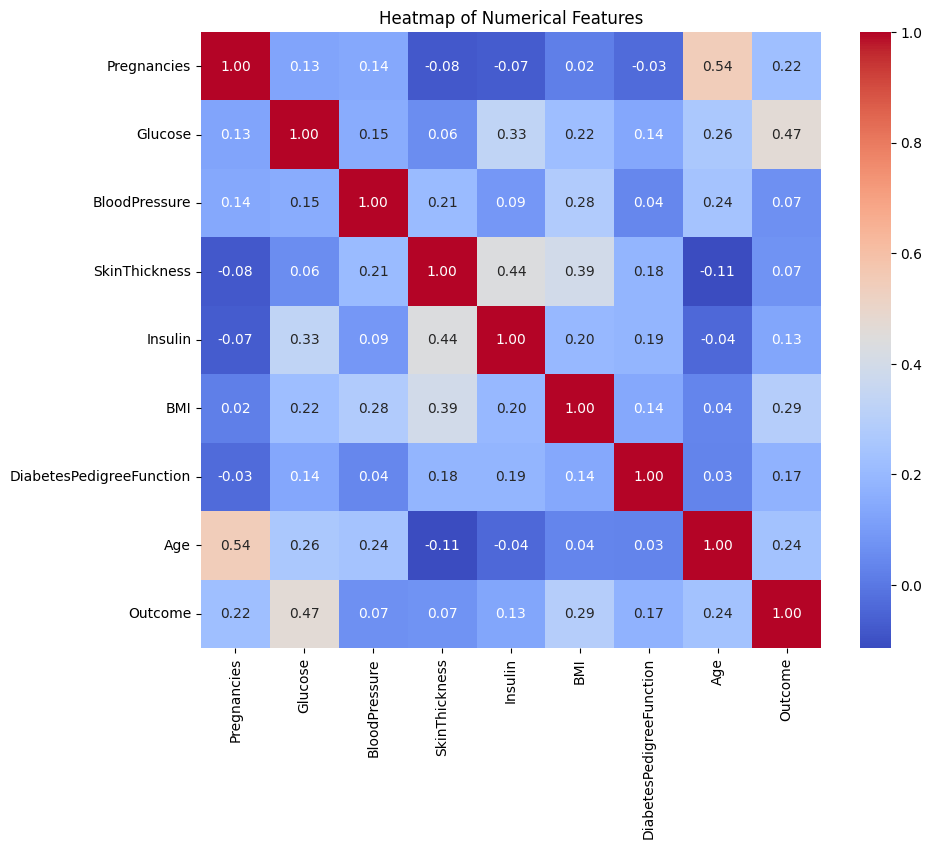

In [12]:
# draw a heatmap to know if there is correltaion between the columns
import seaborn as sns
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Features')
plt.show()

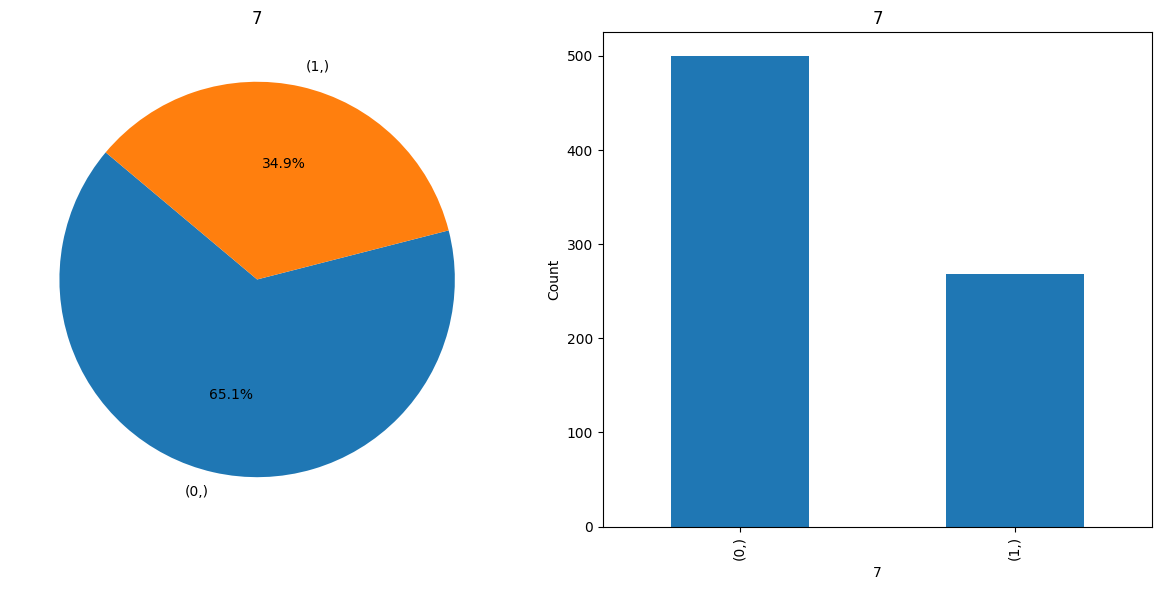

In [13]:
# draw Pie chart and am interactive plot to know if the data is biased or not
import plotly.graph_objects as go

counts = df_cat.value_counts()

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart
axes[0].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title(i)

# Bar chart
counts.plot(kind='bar', ax=axes[1])
axes[1].set_title(i)
axes[1].set_ylabel('Count')
axes[1].set_xlabel(i)

plt.tight_layout()
plt.show()

In [14]:
df_cat.value_counts()

Outcome
0          500
1          268
Name: count, dtype: int64

# Some Notes about our results
1) Most columns are highly skewed
2) There are high amount of outliers in each column
3) The columns are almost uncorrelated at all(there is no multicolinearity issue)
4) The data is imbalanced

# Data Pre-processing

In [73]:
# split the target column
X = df.drop(columns=['Outcome'],axis=1)
y = df['Outcome']

In [74]:
# Let's deal with the outliers by capping their inflience
# Replace outliers in each numerical column using IQR method
for col in X.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace values outside bounds with the min/max acceptable values
    X[col] = X[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

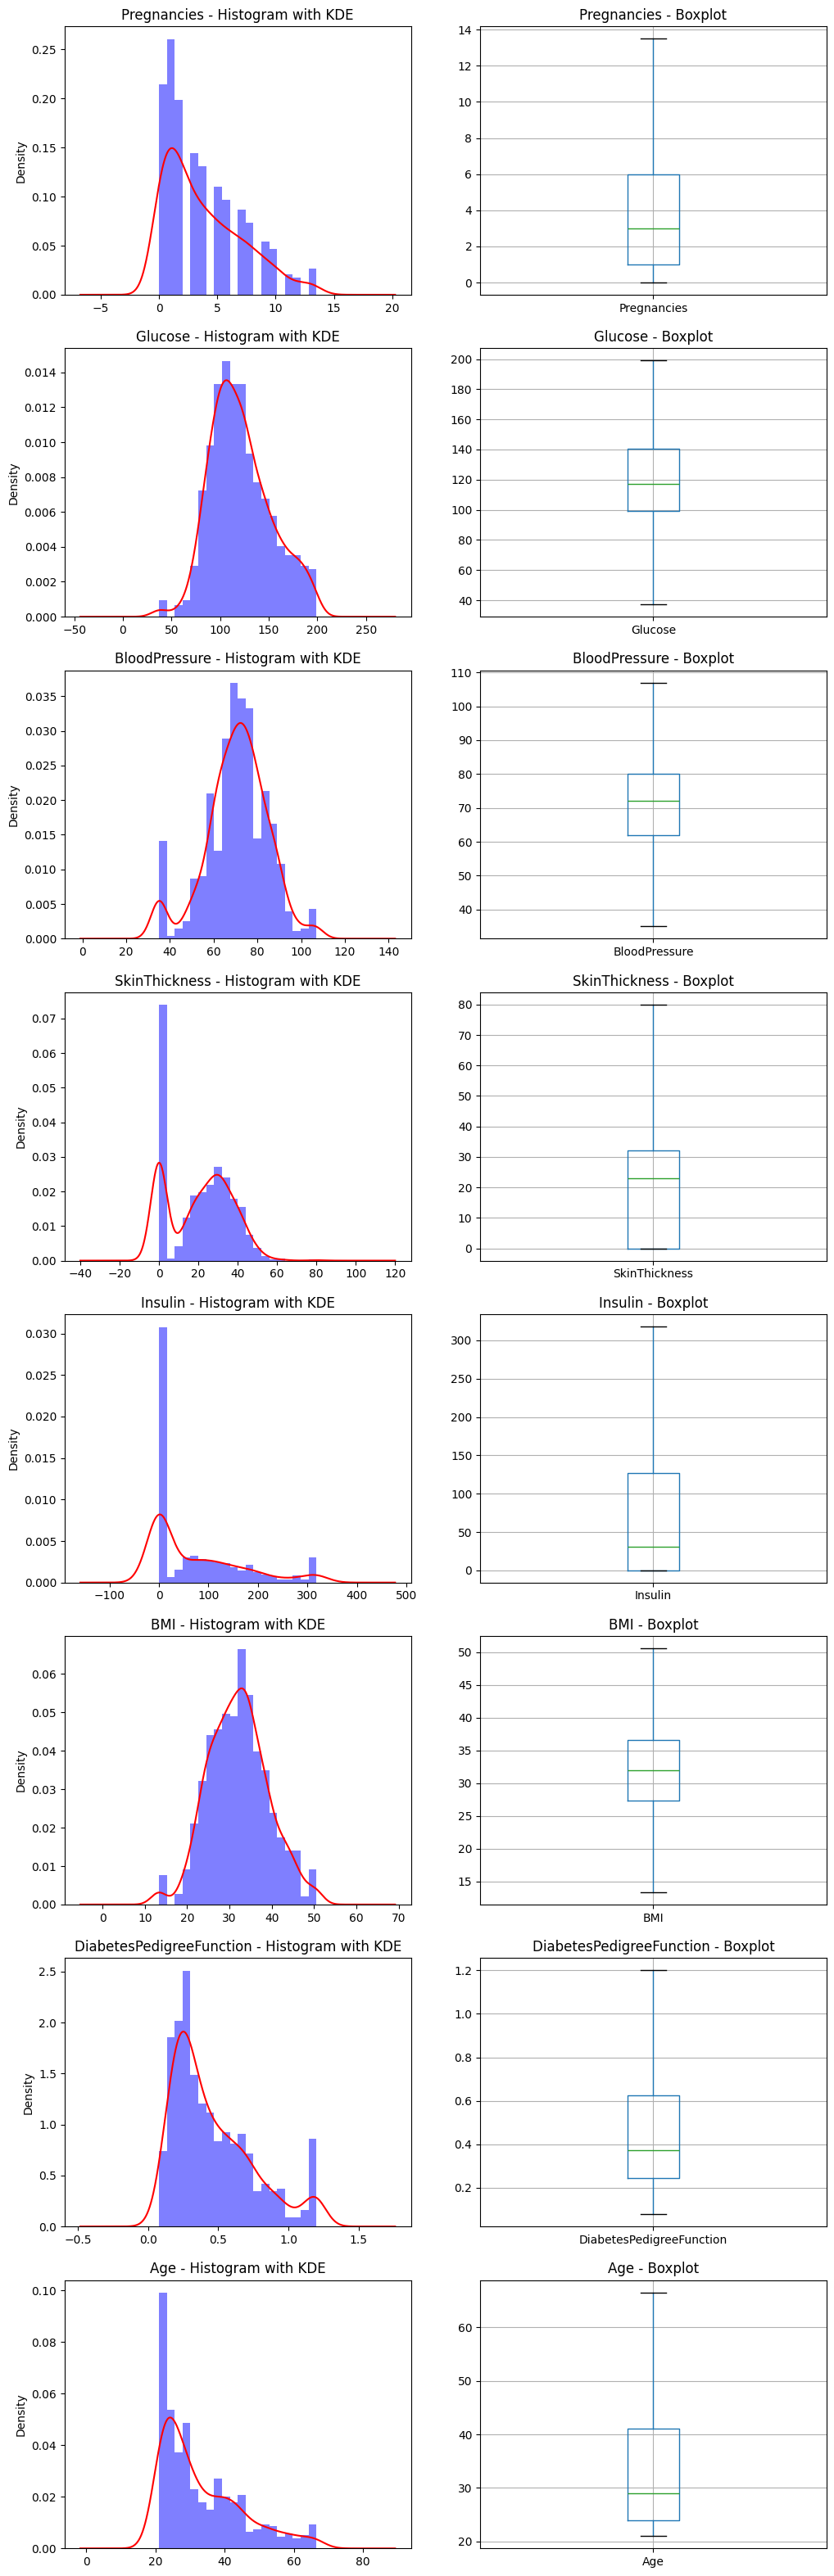

In [75]:
# Let's view them after dealing with the outliers
# Plotting Histogram with KDE and Boxplot for each numerical feature
fig, axes = plt.subplots(len(X.columns), 2, figsize=(12, 5 * len(X.columns)))

for i, col in enumerate(X.columns):
    # Histogram with KDE
    X[col].plot(kind='hist', density=True, ax=axes[i, 0], bins=20, alpha=0.5, color='blue')
    X[col].plot(kind='kde', ax=axes[i, 0], color='red')
    axes[i, 0].set_title(f'{col} - Histogram with KDE')

    # We can add Boxplot to be more clear
    # Boxplot
    X.boxplot(column=col, ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} - Boxplot')

In [76]:
# split the data into tain/test
from sklearn.model_selection import train_test_split

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 ,random_state=42, stratify=y)

# Why apply SMOTE after train_test_split
1) *Prevent Data Leakage*:
    * If you apply SMOTE before splitting, information from the test set indirectly influences the training process through synthetic samples. This violates the principle of keeping the test set unseen during model training and can lead to overfitting and overestimating performance.

2) *Realistic Evaluation*:
    * The goal of a test set is to simulate unseen real-world data. By generating synthetic samples only on the training set, you ensure your model is evaluated on actual data and not on artificially balanced distributions.

3) *Preserve Original Distribution*:
    * Applying SMOTE before splitting alters the natural distribution of classes across your dataset. Splitting first keeps the original class imbalance intact in the test set, allowing a more accurate assessment of your model’s performance.


In [77]:
# Use SMOTE to solve the Imbalance issue
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# fit and transform the data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [78]:
# value counts after resampling
y_train_resampled.value_counts()

,count
Outcome,
0,400
1,400


# Why Apply StandardScaler After SMOTE
1) *SMOTE Uses Nearest Neighbors*
    * SMOTE generates synthetic samples based on the k-nearest neighbors of the minority class.
    * If you scale before SMOTE, the scaling might distort distance calculations, affecting how synthetic samples are generated.

2) *Avoid Data Leakage*
    * If you scale before SMOTE, the scaler learns the mean and standard deviation from an imbalanced dataset.
    * When SMOTE adds new synthetic data, the distribution changes, making the original scaling inaccurate.

3) *Consistent Feature Scaling*
    * After SMOTE, the dataset now has a balanced class distribution. Applying StandardScaler ensures all features are standardized correctly.

In [79]:
# Scale the data using StandardScaler()
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

In [80]:
from sklearn.preprocessing import PolynomialFeatures

# create polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

# fit and transform the data
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

# Build Models, Fine-Tune Hyperparameters

In [81]:
# I will build Logistic Regression,Ridge Classifier,Linear Discriminant Analysis,Random Forest Classifier,Naive Bayes and SVC. Then compare them
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

# Logistic Regression

In [82]:
# Define hyperparameters
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l2', 'elasticnet']
}

# GridSearchCV
grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_lr.fit(X_train, y_train_resampled)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solve

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l2', 'elasticnet'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

# Ridge Classifier

In [83]:
param_grid_ridge = {
    'alpha': [0.01, 0.1, 0.5, 1, 5, 10, 50, 100],
    'solver': ['auto', 'svd', 'lsqr', 'cholesky'],
    'fit_intercept': [True, False]
}

grid_ridge = GridSearchCV(RidgeClassifier(), param_grid_ridge, cv=5, scoring='accuracy', n_jobs=-1)
grid_ridge.fit(X_train, y_train_resampled)

GridSearchCV(cv=5, estimator=RidgeClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 5, 10, 50, 100],
                         'fit_intercept': [True, False],
                         'solver': ['auto', 'svd', 'lsqr', 'cholesky']},
             scoring='accuracy')

# LDA

In [88]:
param_grid_lda = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage': ['auto', None],
    'n_components': [1, 2, 3],
    'priors': [None, 'uniform', 'uniform_2'],
    'tol': [1e-4, 1e-3, 1e-2]
}

grid_lda = GridSearchCV(LinearDiscriminantAnalysis(), param_grid_lda, cv=5, scoring='accuracy', n_jobs=-1)
grid_lda.fit(X_train, y_train_resampled)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
735 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py", line 700, in fit
    raise NotImplementedEr

GridSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'n_components': [1, 2, 3],
                         'priors': [None, 'uniform', 'uniform_2'],
                         'shrinkage': ['auto', None],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 0.001, 0.01]},
             scoring='accuracy')

# Random Forest Classifier

In [85]:
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200, 300, 500],
    'max_depth': [None, 40, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'bootstrap': [True, False]
}

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 40, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200, 300, 500]},
             scoring='accuracy')

# Naïve Bayes

In [86]:
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

grid_nb = GridSearchCV(GaussianNB(), param_grid_nb, cv=5, scoring='accuracy', n_jobs=-1)
grid_nb.fit(X_train, y_train_resampled)

GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='accuracy')

# Train and Evaluate the models

In [89]:
# For each model, get the best estimator and evaluate metrics like accuracy and F1 score

# Logistic Regression
best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

# Ridge Classifier
best_ridge = grid_ridge.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)
accuracy_ridge = accuracy_score(y_test, y_pred_ridge)
f1_ridge = f1_score(y_test, y_pred_ridge)

# LDA
best_lda = grid_lda.best_estimator_
y_pred_lda = best_lda.predict(X_test)
accuracy_lda = accuracy_score(y_test, y_pred_lda)
f1_lda = f1_score(y_test, y_pred_lda)

# Random Forest
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Naïve Bayes
best_nb = grid_nb.best_estimator_
y_pred_nb = best_nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)


# Final Comparison Table

In [90]:
results_df = pd.DataFrame([
    ["Logistic Regression", accuracy_lr, f1_lr],
    ["Ridge Classifier", accuracy_ridge, f1_ridge],
    ["LDA", accuracy_lda, f1_lda],
    ["Random Forest", accuracy_rf, f1_rf],
    ["Naïve Bayes", accuracy_nb, f1_nb]
], columns=["Model", "Accuracy", "F1 Score"])

print(results_df)

                 Model  Accuracy  F1 Score
0  Logistic Regression  0.740260  0.677419
1     Ridge Classifier  0.727273  0.655738
2                  LDA  0.753247  0.693548
3        Random Forest  0.759740  0.666667
4          Naïve Bayes  0.616883  0.520325


In [91]:
# save scaler
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [92]:
# save scaler
import joblib
joblib.dump(best_rf, 'model.pkl')

['model.pkl']